In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [8]:
df=pd.read_excel("HPI_PO_state.xls")
df.head(4)

,state,yr,qtr,index_nsa,index_sa,Warning
0,AK,1991,1,100.00,100.00,"* Note that this state has fewer than 15,000 t..."
1,AK,1991,2,100.79,100.08,"* Note that this state has fewer than 15,000 t..."
2,AK,1991,3,102.08,101.32,"* Note that this state has fewer than 15,000 t..."
3,AK,1991,4,102.24,102.23,"* Note that this state has fewer than 15,000 t..."


In [17]:
states=set(df.state)
df2=df[df.yr>=1995]
df2=df2.reset_index()
df2.head(4)

,index,state,yr,qtr,index_nsa,index_sa,Warning
0,16,AK,1995,1,114.50,114.15,"* Note that this state has fewer than 15,000 t..."
1,17,AK,1995,2,116.28,115.27,"* Note that this state has fewer than 15,000 t..."
2,18,AK,1995,3,117.65,117.00,"* Note that this state has fewer than 15,000 t..."
3,19,AK,1995,4,117.40,117.65,"* Note that this state has fewer than 15,000 t..."


In [18]:
def dates():
    dd=pd.DataFrame({'quarter':[1,2,3,4],'month':[3,6,9,12],'day':[31,30,30,31]})   # relate quarter to their specific month and day.
    d=list()                                                                        # list of the dates related to the quarters
    for i in range(df2.shape[0]):                                                   
        for j in range(dd.shape[0]):
            if df2.qtr[i]==dd.quarter[j]:
                d.append(str(df2.yr[i])+'-'+str(dd.month[j])+'-'+str(dd.day[j]))    # append each date related to a quarter
            j=j+1
        i=i+1
    return pd.to_datetime(d)



In [19]:
df2['dates']=dates()        # added a column of dates to df2
df2.head(4)

,index,state,yr,qtr,index_nsa,index_sa,Warning,dates
0,16,AK,1995,1,114.50,114.15,"* Note that this state has fewer than 15,000 t...",1995-03-31
1,17,AK,1995,2,116.28,115.27,"* Note that this state has fewer than 15,000 t...",1995-06-30
2,18,AK,1995,3,117.65,117.00,"* Note that this state has fewer than 15,000 t...",1995-09-30
3,19,AK,1995,4,117.40,117.65,"* Note that this state has fewer than 15,000 t...",1995-12-31


In [30]:
df2['price_growth']=df2['index_sa'].pct_change(1)*100
df2.head(4)

,index,state,yr,qtr,index_nsa,index_sa,Warning,dates,price_growth
0,16,AK,1995,1,114.50,114.15,"* Note that this state has fewer than 15,000 t...",1995-03-31,NaN
1,17,AK,1995,2,116.28,115.27,"* Note that this state has fewer than 15,000 t...",1995-06-30,0.981165
2,18,AK,1995,3,117.65,117.00,"* Note that this state has fewer than 15,000 t...",1995-09-30,1.500824
3,19,AK,1995,4,117.40,117.65,"* Note that this state has fewer than 15,000 t...",1995-12-31,0.555556


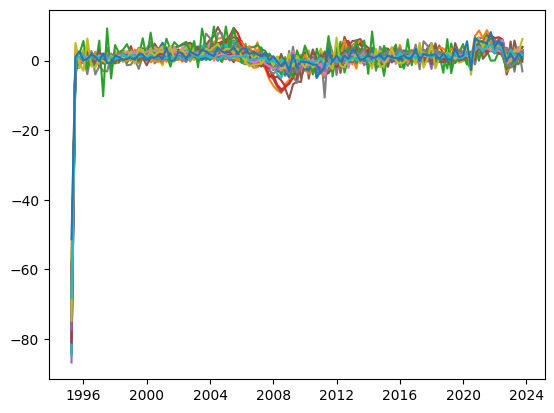

In [31]:
fig=plt.subplots()
for s in list(states):
    # v=pd.Series(df2[df2.state==s]['index_sa'])
    plt.plot(df2[df2.state==s]['dates'],df2[df2.state==s]['price_growth'])


In [38]:
df2[df2.yr>=2020].groupby('state')['price_growth'].mean().sort_values()

state
DC    0.780072
LA    1.560062
ND    1.667173
AK    1.938980
MN    2.041438
IA    2.141001
WV    2.161793
MD    2.200468
IL    2.215858
OR    2.267800
CA    2.363016
MS    2.392234
WY    2.395166
HI    2.400949
CO    2.407688
DE    2.416935
NV    2.499854
PA    2.504409
VA    2.516613
MA    2.521428
OK    2.563945
WA    2.565242
KS    2.573191
TX    2.604399
NE    2.609378
NY    2.612347
KY    2.613744
MI    2.627419
MO    2.644861
WI    2.655312
OH    2.726464
NM    2.727989
IN    2.734158
AL    2.766196
SD    2.772778
NJ    2.855152
AR    2.884670
CT    2.935235
RI    3.028741
UT    3.030090
GA    3.190700
SC    3.195608
TN    3.236664
AZ    3.238526
NH    3.293187
ID    3.325071
VT    3.344080
NC    3.361717
MT    3.415916
ME    3.593964
FL    3.595066
Name: price_growth, dtype: float64